In [1]:
# import requests
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# 
# from _csv import writer
# from scipy.special import softmax
# import torch
import pandas as pd
# import html
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize


In [2]:
# Load the data in a dataframe
pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000)
df =pd.read_csv("final_sample.csv",usecols=["tweet","sentiment"])

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.tweet)

CountVectorizer()

In [4]:
len(cvec.get_feature_names_out())

87029

In [5]:
df.tail()

,tweet,sentiment
107146,possible benefits web3 nftrade nftradeambassador metaverse,positive
107147,im grateful born generation played ball outside instead virtual reality world however say virtual reality aiart metaverse pretty cool,positive
107148,breaking gaming news biggest gaming news august 30 2022 thegamer metaverse vr ar web3 gamingcommunity blockchain crypto innovation nft datascience bigdata analytics digital,positive
107149,join powerstar birthday celebrations trendy way first ever metaverse fanspace star world experience powerstarfanarena metaverse pawanakalyan powerstarpawankalyan jalsa jalsa4k jalsaspecialshows,positive
107150,ai tasked keeping metaverse safe comes lot gpu firepower web3 technology nftcommunity lunc techforgood fintech finserv cloud lunaclassic datascience flutter,positive


In [6]:
import numpy as np

In [7]:
neg_doc_matrix = cvec.transform(df[df.sentiment == "negative"].tweet)
pos_doc_matrix = cvec.transform(df[df.sentiment == "positive"].tweet)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df.tweet)

CountVectorizer(max_features=10000, stop_words='english')

In [9]:
document_matrix = cvec.transform(df.tweet)

In [10]:
%%time
pos_batches = np.linspace(37023,107150,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

44814 entries' term freuquency calculated
52606 entries' term freuquency calculated
60398 entries' term freuquency calculated
68190 entries' term freuquency calculated
75982 entries' term freuquency calculated
83774 entries' term freuquency calculated
91566 entries' term freuquency calculated
99358 entries' term freuquency calculated
107150 entries' term freuquency calculated
CPU times: user 2.12 s, sys: 2.38 s, total: 4.5 s
Wall time: 4.55 s


In [11]:
%%time
neg_batches = np.linspace(1,10679,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1


1187 entries' term freuquency calculated
2373 entries' term freuquency calculated
3560 entries' term freuquency calculated
4746 entries' term freuquency calculated
5933 entries' term freuquency calculated
7119 entries' term freuquency calculated
8306 entries' term freuquency calculated
9492 entries' term freuquency calculated
10679 entries' term freuquency calculated
CPU times: user 248 ms, sys: 145 ms, total: 393 ms
Wall time: 393 ms


In [12]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names_out()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
metaverse,11625,78515,90140
nft,5388,30933,36321
nfts,3348,19481,22829
nftcommunity,2279,11936,14215
web3,1223,9559,10782
crypto,1439,8697,10136
join,952,8160,9112
p2e,1034,6124,7158
new,934,6208,7142
like,337,6408,6745


In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

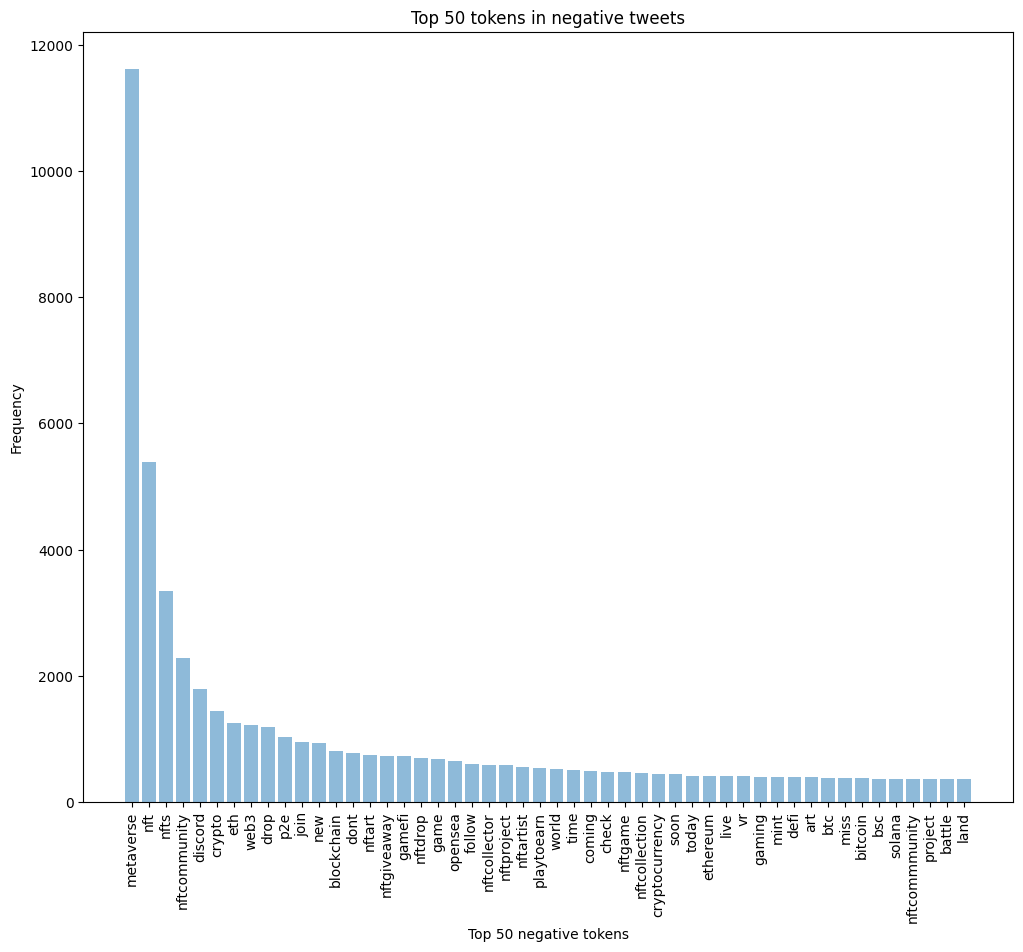

In [14]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

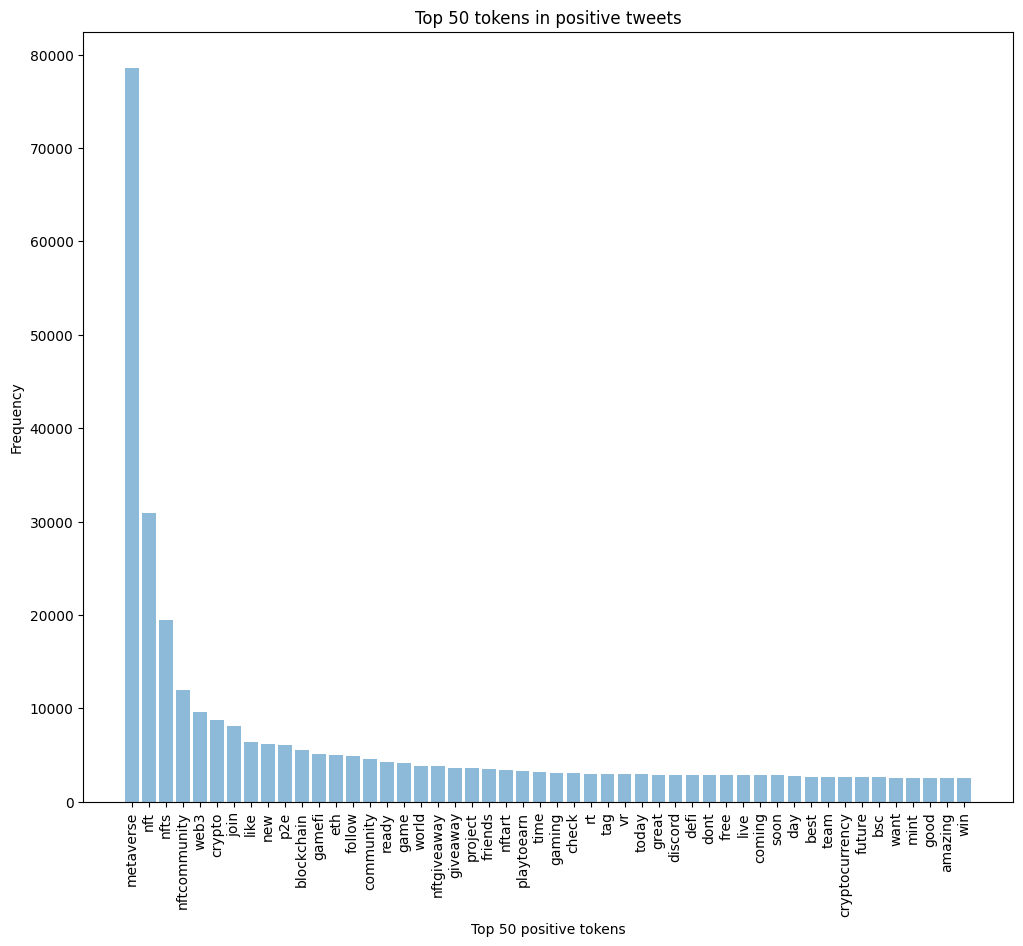

In [15]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df2.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

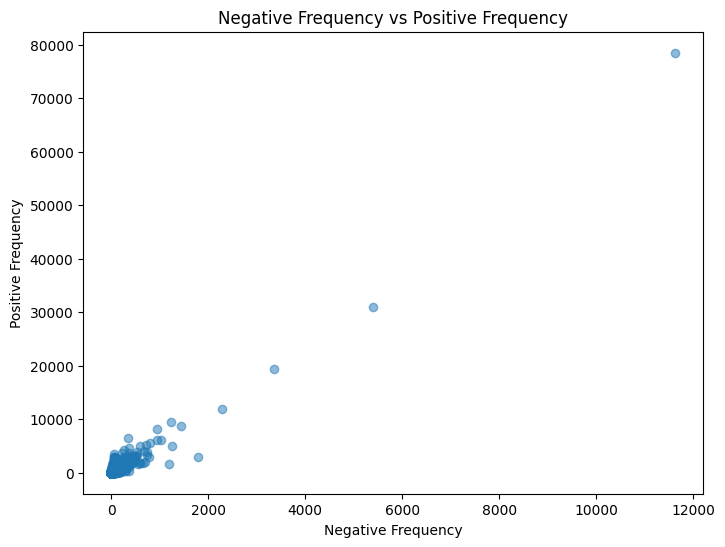

In [16]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [17]:

term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
fab,0,17,17,1.0
treasurehunt,0,12,12,1.0
travel2earn,0,38,38,1.0
reference,0,27,27,1.0
traveler,0,10,10,1.0
travelling,0,13,13,1.0
redluna,0,14,14,1.0
icons,0,14,14,1.0
foxy,0,14,14,1.0
mayhem,0,15,15,1.0


In [18]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
metaverse,11625,78515,90140,0.871034,0.067691
nft,5388,30933,36321,0.851656,0.026669
nfts,3348,19481,22829,0.853344,0.016795
nftcommunity,2279,11936,14215,0.839676,0.010291
web3,1223,9559,10782,0.886570,0.008241
crypto,1439,8697,10136,0.858031,0.007498
join,952,8160,9112,0.895522,0.007035
like,337,6408,6745,0.950037,0.005525
new,934,6208,7142,0.869224,0.005352
p2e,1034,6124,7158,0.855546,0.005280


In [19]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean
metaverse,11625,78515,90140,0.871034,0.067691,0.125620
nft,5388,30933,36321,0.851656,0.026669,0.051718
nfts,3348,19481,22829,0.853344,0.016795,0.032942
nftcommunity,2279,11936,14215,0.839676,0.010291,0.020332
web3,1223,9559,10782,0.886570,0.008241,0.016331
crypto,1439,8697,10136,0.858031,0.007498,0.014866
join,952,8160,9112,0.895522,0.007035,0.013960
like,337,6408,6745,0.950037,0.005525,0.010985
new,934,6208,7142,0.869224,0.005352,0.010639
p2e,1034,6124,7158,0.855546,0.005280,0.010495


In [20]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:50]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
friends,50,3472,3522,0.985804,0.002993,0.005969,0.829430,0.999827,0.906692
best,47,2686,2733,0.982803,0.002316,0.004621,0.823529,0.996928,0.901970
tag,55,2975,3030,0.981848,0.002565,0.005116,0.821625,0.998848,0.901610
free,55,2861,2916,0.981139,0.002467,0.004921,0.820201,0.998286,0.900524
win,47,2516,2563,0.981662,0.002169,0.004329,0.821252,0.994747,0.899712
amazing,52,2516,2568,0.979751,0.002169,0.004329,0.817396,0.994747,0.897393
thank,38,2079,2117,0.982050,0.001792,0.003578,0.822029,0.981817,0.894846
happy,26,1851,1877,0.986148,0.001596,0.003186,0.830100,0.967825,0.893687
great,76,2908,2984,0.974531,0.002507,0.005001,0.806603,0.998543,0.892368
love,66,2455,2521,0.973820,0.002117,0.004224,0.805103,0.993679,0.889506


In [21]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
battle,368,307,675,0.454815,0.000265,0.000529,0.000901,0.580683,0.001798,0.545185,0.002186,0.004355,0.999099,0.992372,0.995724
drop,1182,1591,2773,0.573747,0.001372,0.002737,0.013591,0.942089,0.026796,0.426253,0.007022,0.013817,0.986409,1.000000,0.993158
discord,1793,2889,4682,0.617044,0.002491,0.004961,0.030276,0.998444,0.058769,0.382956,0.010652,0.020727,0.969724,1.000000,0.984630
ill,280,314,594,0.528620,0.000271,0.000541,0.005309,0.583597,0.010522,0.471380,0.001663,0.003315,0.994691,0.965486,0.979871
nftdrops,297,407,704,0.578125,0.000351,0.000701,0.014804,0.621816,0.028919,0.421875,0.001764,0.003514,0.985196,0.973547,0.979337
nftartists,311,616,927,0.664509,0.000531,0.001061,0.065183,0.703009,0.119303,0.335491,0.001848,0.003675,0.934817,0.978944,0.956372
fight,198,205,403,0.508685,0.000177,0.000353,0.003385,0.537801,0.006728,0.491315,0.001176,0.002347,0.996615,0.894659,0.942889
nftshill,224,419,643,0.651633,0.000361,0.000722,0.053543,0.626670,0.098656,0.348367,0.001331,0.002651,0.946457,0.923832,0.935008
low,180,225,405,0.555556,0.000194,0.000388,0.009427,0.546260,0.018533,0.444444,0.001069,0.002134,0.990573,0.870198,0.926492
missed,174,216,390,0.553846,0.000186,0.000372,0.009100,0.542456,0.017899,0.446154,0.001034,0.002063,0.990900,0.861233,0.921528


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

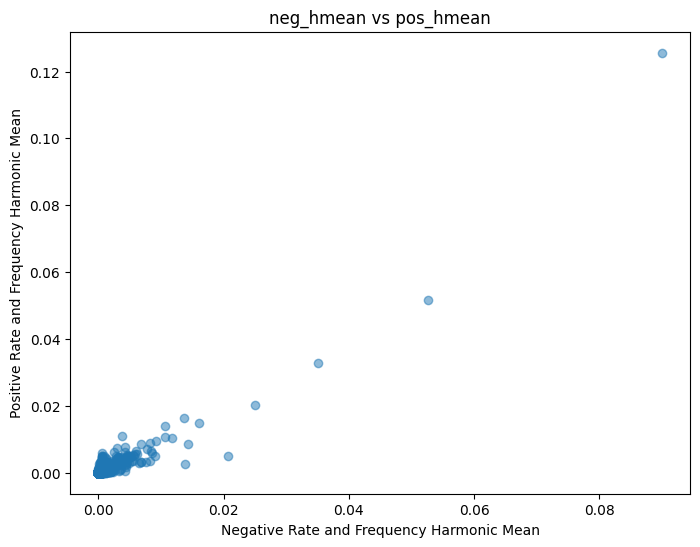

In [22]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

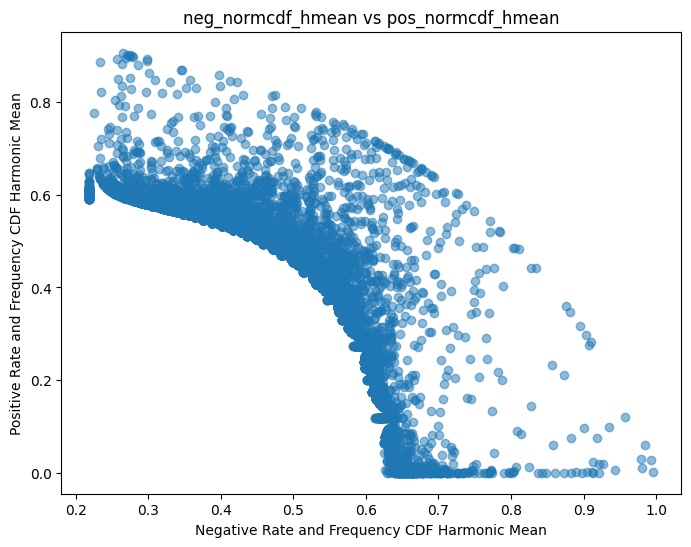

In [23]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [24]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...